<a href="https://colab.research.google.com/github/RubenCedillo123/Machine-Learning/blob/main/ClaseUMBRAL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Librerías

In [ ]:
import pandas as pd
import csv
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_wine
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import ParameterGrid
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV

# DTs para el conjunto de datos 2D sintético

## 1. Datos

* Cargamos el conjunto de datos "sintetico_2d.csv"

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

with open('/content/drive/MyDrive/Colab Notebooks/TS Física Computacional III/Práctica 7/sintetico_2d.csv') as file:
  df = pd.read_csv(file)

df

Mounted at /content/drive


,x,y,target
0,9.833469,0.319565,0
1,1.801045,8.705072,0
2,4.423918,3.488906,1
3,0.280730,2.689037,1
4,5.999494,9.167512,0
...,...,...,...
495,4.995458,8.437083,0
496,6.636632,9.931535,0
497,6.373259,8.098388,0
498,1.230331,7.169844,1


* Vamos a visualizar las agrupaciones del conjunto de datos.

* Lafunción $scatter()$
 es el "caballo de batalla" para explorar relaciones complejas en datos tabulares, especialmente útil en la fase EDA (Exploratory Data Analysis) que precede al modelado con árboles de decisión.

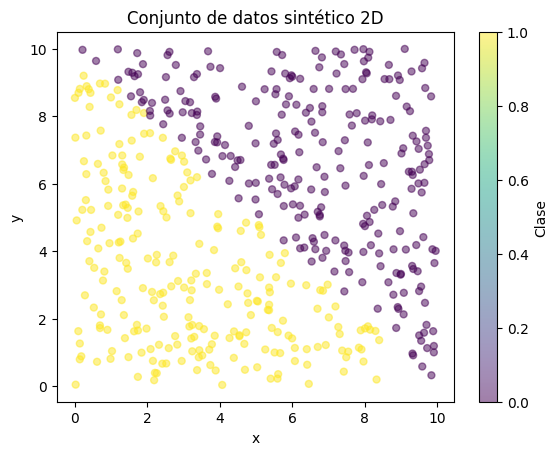

In [ ]:
X = df[['x', 'y']].values
y = df['target'].values

plt.scatter(X[:, 0], X[:, 1], c=y, alpha=0.5, s = 25)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Conjunto de datos sintético 2D')
plt.colorbar(label='Clase')
plt.show()

## 2. Árbol de Decisión

* Ahora entrenamos un árbol de decisiones simple, usando todos los datos.

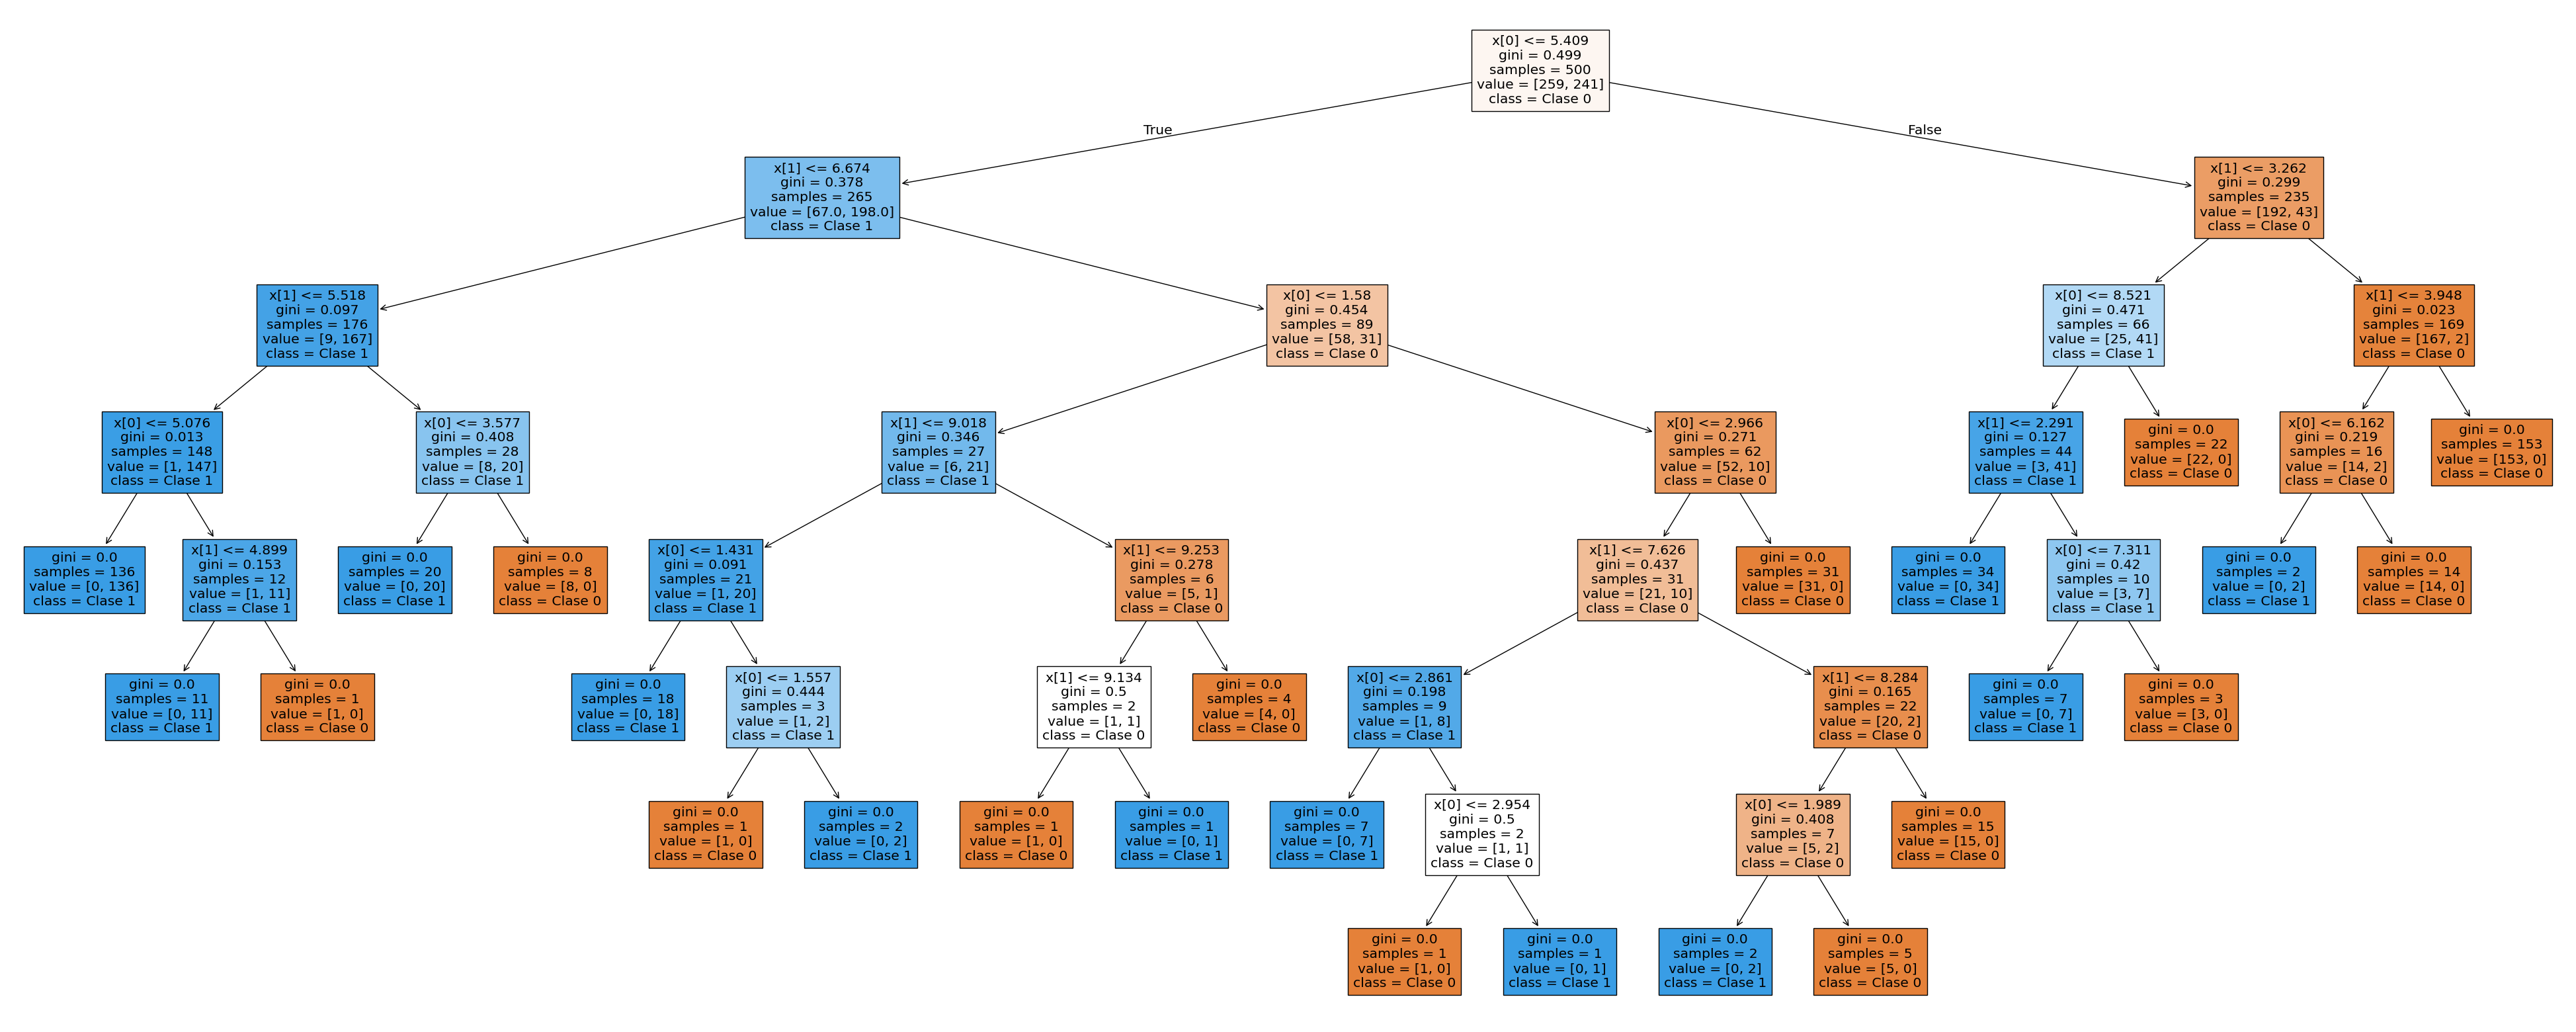

In [ ]:
X = df[['x', 'y']].values
y = df['target'].values

clf = DecisionTreeClassifier()
clf.fit(X, y)

plt.figure(figsize=(50, 20))
plot_tree(
    clf,
    feature_names=df.feature_names if hasattr(df, 'feature_names') else None,
    class_names=['Clase 0', 'Clase 1'] if len(set(y)) == 2 else None, filled = True)
plt.show()

* ¿Qué está aprendiendo el árbol?
  *  Este árbol de decisión está identificando regiones en el espacio 2D donde cada clase predomina.

* ¿Por qué?

  * El árbol está aprendiendo regiones donde cada clase predomina porque:
    + Busca minimizar la impureza (Gini) en cada división.
    * Selecciona divisiones que maximizan la separación entre clases.
    + Construye reglas jerárquicas, generando subregiones homogéneas en el espacio 2D.
    + La forma de las divisiones (condiciones en
𝑥
[
0
]
x[0] y
𝑥
[
1
]
x[1]) hace que el espacio se parta en rectángulos donde cada clase predomina.

¿Por qué salen rectángulos?
Las divisiones son del tipo
𝑥
[
𝑖
]
≤
x[i]≤ umbral → Solo cortan el espacio en líneas verticales u horizontales.

Cada nueva división genera una subregión rectangular → Los nodos del árbol corresponden a rectángulos en el espacio.

El árbol sigue dividiendo hasta que los nodos son puros o se alcanza un límite → Se generan muchos rectángulos pequeños si el árbol crece demasiado.

## 3. Información almacenada por el árbol

* Al generar un árbol se obtienen dos propiedades importantes: $clf.tree_.feature$ y $clf.tree_.threshold$:

In [ ]:
clf.tree_.feature

array([ 0,  1,  1,  0, -2,  1, -2, -2,  0, -2, -2,  0,  1,  0, -2,  0, -2,
       -2,  1,  1, -2, -2, -2,  0,  1,  0, -2,  0, -2, -2,  1,  0, -2, -2,
       -2, -2,  1,  0,  1, -2,  0, -2, -2, -2,  1,  0, -2, -2, -2],
      dtype=int64)

* Este índica que característica se usa para dividir cada nodo

In [ ]:
clf.tree_.threshold

array([ 5.40876412,  6.6744628 ,  5.51829243,  5.07607341, -2.        ,
        4.89870858, -2.        , -2.        ,  3.57739341, -2.        ,
       -2.        ,  1.57965869,  9.01819515,  1.4306519 , -2.        ,
        1.55743814, -2.        , -2.        ,  9.253016  ,  9.13419342,
       -2.        , -2.        , -2.        ,  2.96561909,  7.62585855,
        2.86126113, -2.        ,  2.95399797, -2.        , -2.        ,
        8.28434324,  1.98910064, -2.        , -2.        , -2.        ,
       -2.        ,  3.26193082,  8.52058029,  2.29148185, -2.        ,
        7.31053472, -2.        , -2.        , -2.        ,  3.94774652,
        6.16223955, -2.        , -2.        , -2.        ])

* Este guarda los valores umbral usados en cada división

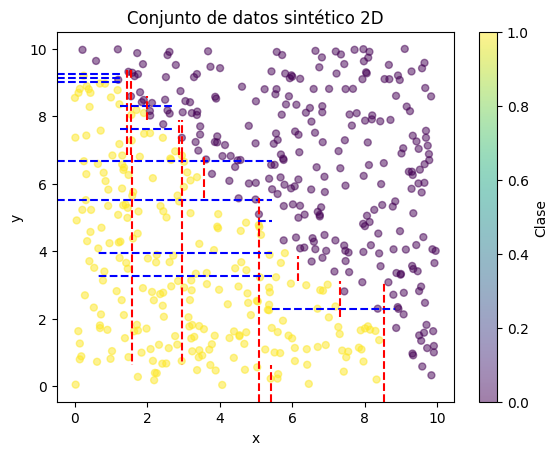

In [ ]:
def dibujar_divisiones(features, thresholds, indice, x_min, x_max, y_min, y_max):
    feature = features[indice]
    umbral = thresholds[indice]

    if feature == -2:
        return 1

    if feature == 0:
        plt.axvline(x=umbral, ymin=y_min / 10, ymax=y_max / 10, color='red', linestyle='--')

        izquierda = (x_min, umbral, y_min, y_max)
        derecha   = (umbral, x_max, y_min, y_max)

    else:
        plt.axhline(y=umbral, xmin=x_min / 10, xmax=x_max / 10, color='blue', linestyle='--')

        izquierda = (x_min, x_max, y_min, umbral)
        derecha   = (x_min, x_max, umbral, y_max)

    offset_izq = dibujar_divisiones(features, thresholds, indice + 1, *izquierda)
    offset_der = dibujar_divisiones(features, thresholds, indice + offset_izq + 1, *derecha)

    return offset_izq + offset_der + 1



plt.scatter(X[:, 0], X[:, 1], c=y, alpha=0.5, s = 25)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Conjunto de datos sintético 2D')
plt.colorbar(label='Clase')
dibujar_divisiones(clf.tree_.feature, clf.tree_.threshold, 0, 0, 1, 0, 1)
plt.show()

## 4. Nueva Variable Simple

* Para ayudar al árbol de decisión a aprender más rápido y generar fronteras de decisión más simples, podemos crear una nueva variable que combine las dos características de entrada.

* Algunos Tipos son:

1. Radial (Distancia al origen o a un centro):
     
     Si los datos tienen una distribución en forma de regiones concéntricas o curvas:

$$r = \sqrt{x_0^2 + x_1^2}$$

  + o si hay un centro en los datos $(x_c, y_c)$:

$$r = \sqrt{(x_0-x_c)^2+(x_1-y_c)^2}$$

* ¿Por qué ayuda?

   + En lugar de dividir el espacio con líneas rectas horizontales y verticales, el árbol podría separar las clases con divisiones más naturales.

2. Suma o resta:

$$s = x_0 + x_1$$

$$d = x_0 - x_1$$

  * Si la frontera de decisión tiene una tendencia diagonal "Está es la que usaremos"

3. Producto o Interacción de Variables

$$ p = x_0 \cdot x_1$$

* Si la relación entre las clases depende de la interacción entre $x_0$ y $x_1$

# DTs para el conjunto de lunas

## 1. Conjunto de datos sintético de las lunas

* Cargamos los datos

In [ ]:
from sklearn.datasets import make_moons
X_m, y_m = make_moons(n_samples=1000, noise=0.1, random_state=123)
df_m = pd.DataFrame({'x': X_m[:, 0], 'y': X_m[:, 1], 'target': y_m})
df_m

,x,y,target
0,0.666374,0.823195,0
1,0.281627,0.947888,0
2,0.938688,0.133326,0
3,0.255610,-0.078239,1
4,0.754683,0.756513,0
...,...,...,...
995,1.987660,0.531155,1
996,-0.296662,1.090908,0
997,-0.546628,0.677330,0
998,-0.678874,0.739254,0


* Gráficamos

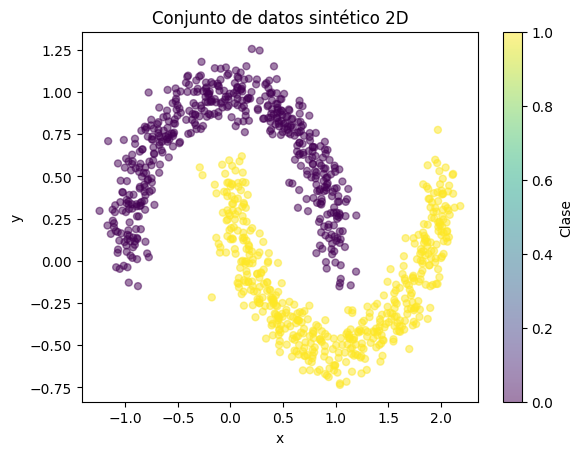

In [ ]:
plt.scatter(X_m[:, 0], X_m[:, 1], c=y_m, alpha=0.5, s = 25)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Conjunto de datos sintético 2D')
plt.colorbar(label='Clase')
plt.show()

## 2. Árbol de Decisión

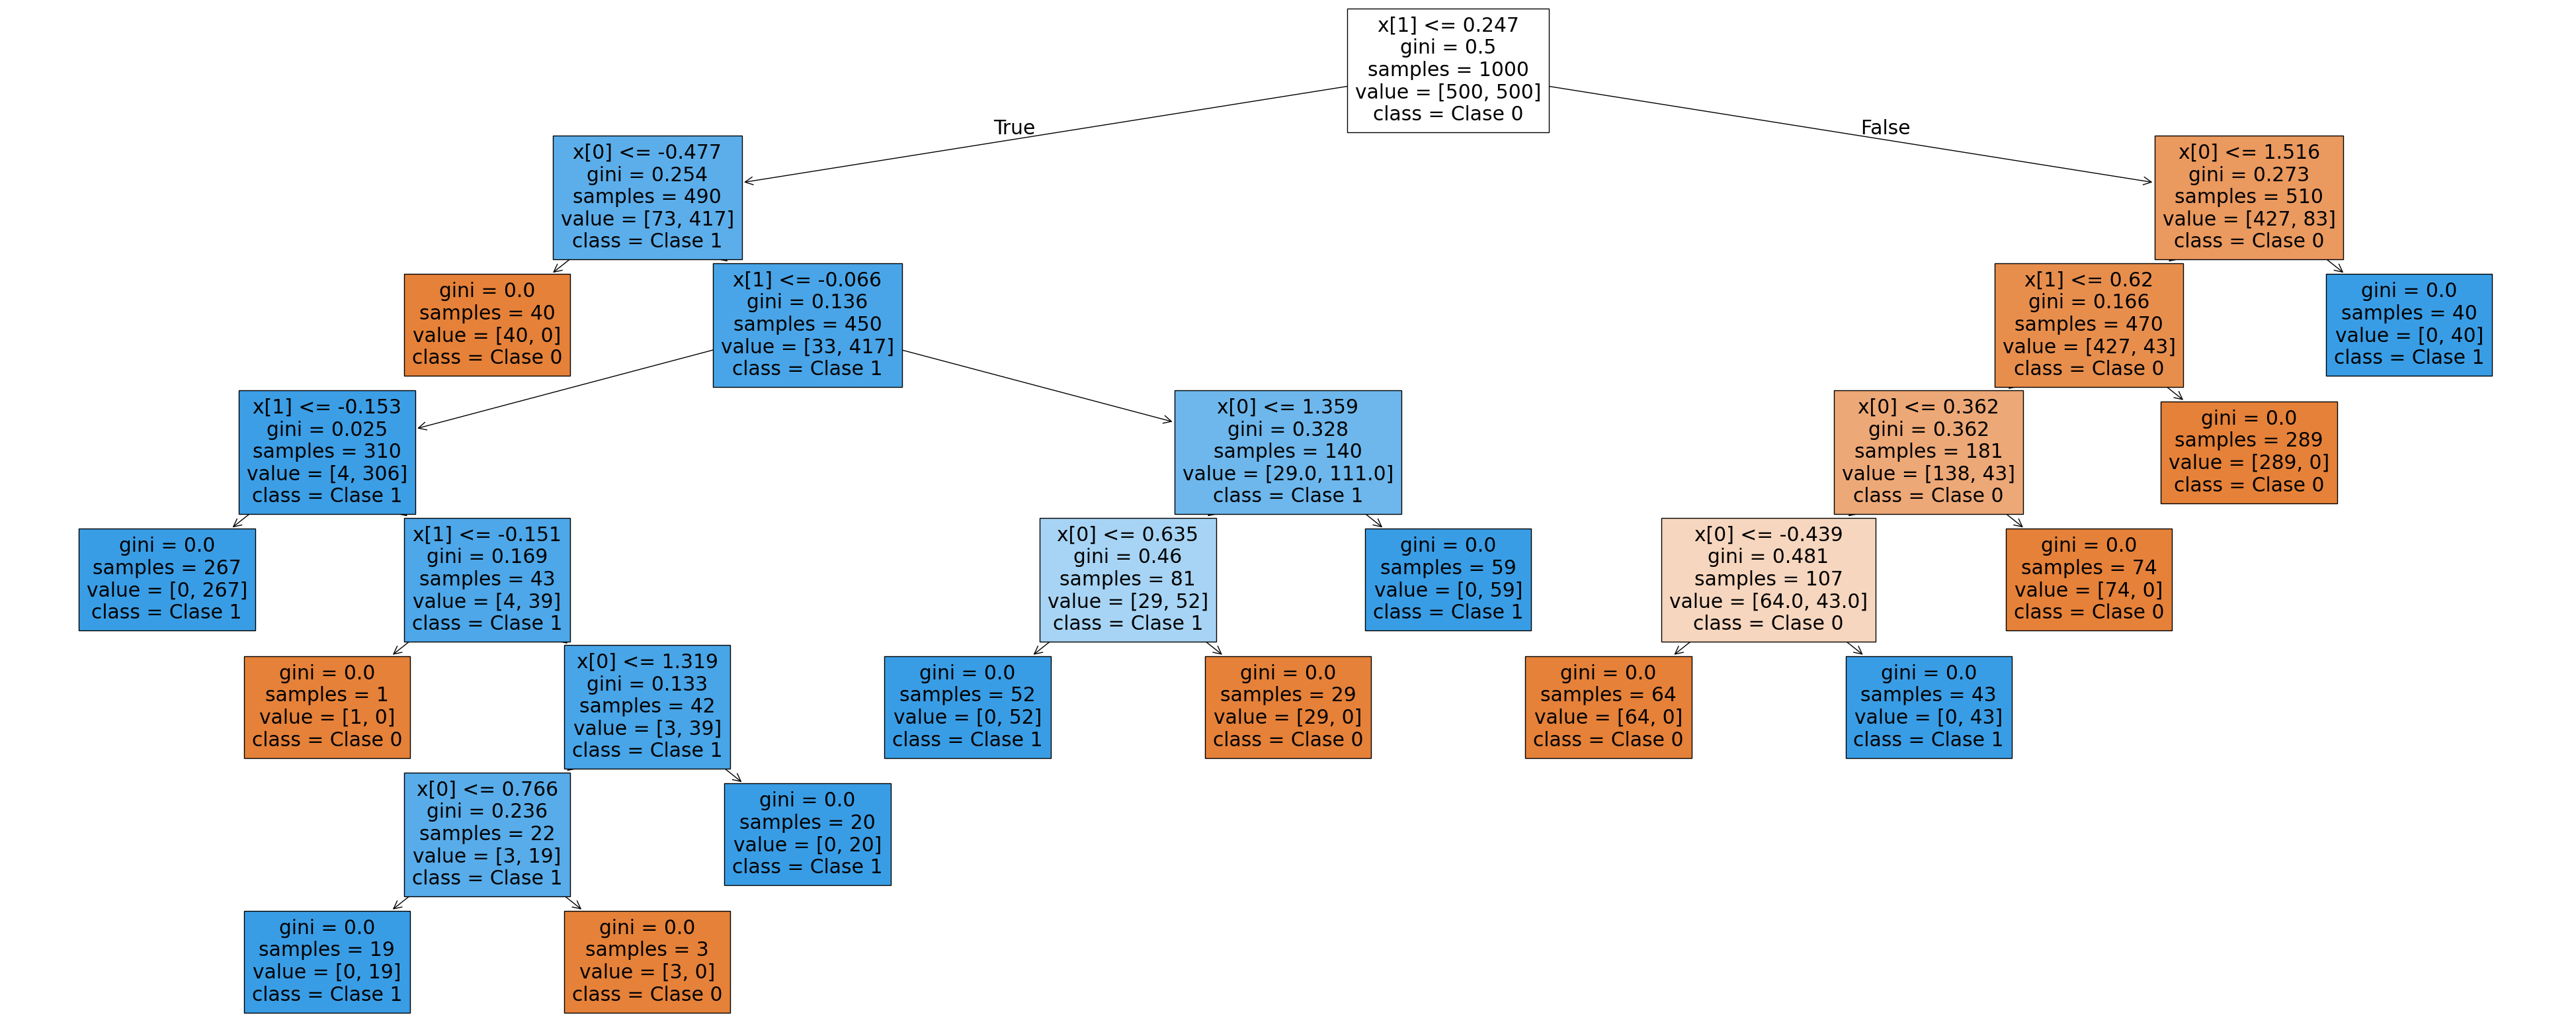

In [ ]:
X_m = df_m[['x', 'y']].values
y_m = df_m['target'].values

clf_1 = DecisionTreeClassifier()
clf_1.fit(X_m, y_m)

plt.figure(figsize=(50, 20))
plot_tree(clf_1, filled=True, feature_names=df.feature_names if hasattr(df, 'feature_names') else None, class_names=['Clase 0', 'Clase 1'] if len(set(y)) == 2 else None)
plt.show()

## 3. Dibujar Frontera

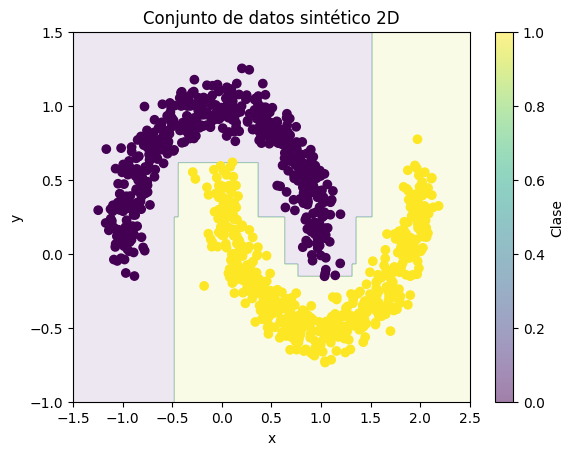

In [ ]:
def dibujar_frontera_decision(clf, X, y, x_min, x_max, y_min, y_max):
    puntos_x = np.linspace(x_min, x_max, 300)
    puntos_y = np.linspace(y_min, y_max, 300)
    malla_x, malla_y = np.meshgrid(puntos_x, puntos_y)

    rejilla = np.c_[malla_x.ravel(), malla_y.ravel()]

    predicciones = clf.predict(rejilla).reshape(malla_x.shape)

    plt.contourf(malla_x, malla_y, predicciones, alpha=0.1)

    plt.scatter(X[:, 0], X[:, 1], c=y)


plt.scatter(X_m[:, 0], X_m[:, 1], c=y_m, alpha=0.5, s = 25)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Conjunto de datos sintético 2D')
plt.colorbar(label='Clase')
dibujar_frontera_decision(clf_1, X_m, y_m, -1.5, 2.5, -1, 1.5)
plt.show()




## 4. Aumentar Ruido

In [ ]:
#Datos, con ruido "0.5"
X_m_2, y_m_2 = make_moons(n_samples=1000, noise=0.5, random_state=123)
df_m_2 = pd.DataFrame({'x': X_m_2[:, 0], 'y': X_m_2[:, 1], 'target': y_m_2})


#División de los datos
X_train_m_2, X_test_m_2, y_train_m_2, y_test_m_2 = train_test_split(X_m_2, y_m_2, test_size=0.2, random_state=123, shuffle=True)

#Árbol de Decisión
clf_2 = DecisionTreeClassifier()
clf_2.fit(X_train_m_2, y_train_m_2)

DecisionTreeClassifier()

In [ ]:
y_p_1 = clf_2.predict(X_test_m_2)
y_p_2 = clf_2.predict(X_train_m_2)

print(accuracy_score(y_train_m_2, y_p_2))
print(accuracy_score(y_test_m_2, y_p_1))

1.0
0.77


* Esto demuestra overfitting

  1. Precisión en entrenamiento = 1.0:

    + El árbol memorizó perfectamente los datos de entrenamiento (incluso el ruido).

    + Esto ocurre porque los árboles sin restricciones (max_depth=None) crean nodos hasta que todas las hojas son puras.

  2. Precisión en prueba << 1.0:

    + El modelo no generaliza bien a datos nuevos (el ruido alto dificulta aprender patrones reales).

    + La diferencia grande entre train y test es la señal clásica de overfitting.

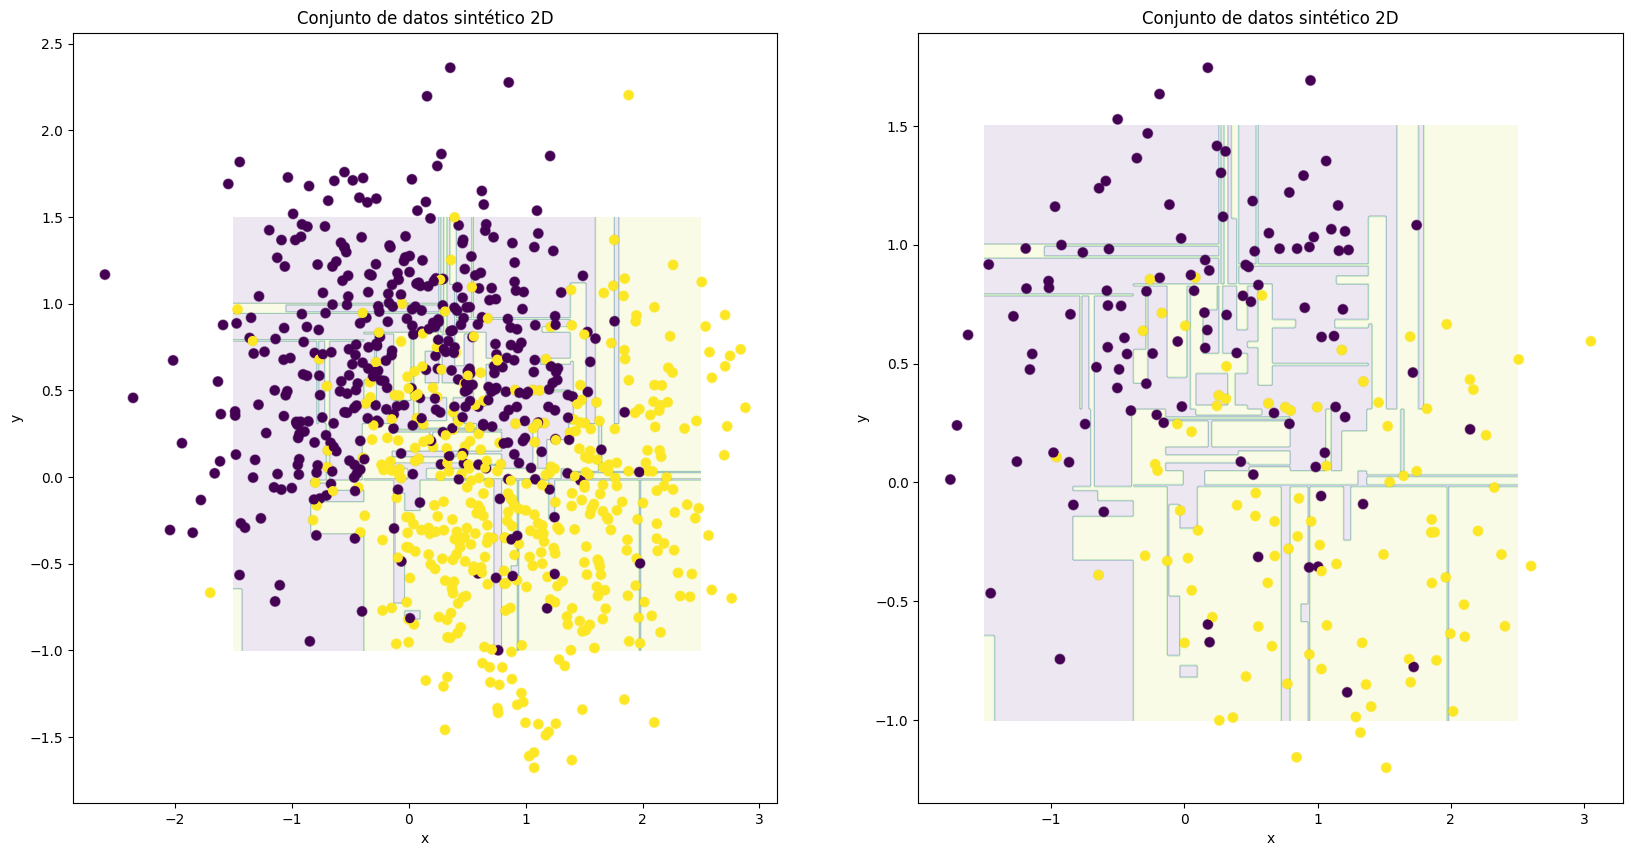

In [ ]:
#Visualización del Overfitting

plt.figure(figsize=(20, 10))

plt.subplot(1, 2, 1)
plt.scatter(X_train_m_2[:, 0], X_train_m_2[:, 1], c=y_train_m_2, alpha=0.5, s = 50)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Conjunto de datos sintético 2D')
dibujar_frontera_decision(clf_2, X_train_m_2, y_train_m_2, -1.5, 2.5, -1, 1.5)

plt.subplot(1, 2, 2)
plt.scatter(X_test_m_2[:, 0], X_test_m_2[:, 1], c=y_test_m_2, alpha=0.5, s = 50)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Conjunto de datos sintético 2D')
dibujar_frontera_decision(clf_2, X_test_m_2, y_test_m_2, -1.5, 2.5, -1, 1.5)


plt.show()


# Gradient Boosting

* Gradient Boosting es un método de ensamble que construye modelos de forma
secuencial donde cada nuevo árbol se entrena para corregir los errores del
modelo anterior.

* Este enfoque se denomina gradient boosting porque el modelo minimiza una
función de pérdida paso a paso, utilizando el gradiente (dirección de máximo
descenso) para reducir el error en cada iteración.

* **Parámetros Importanes $Gradient$ $Boosting$**:

  + $n$_$estimators$: Número de árboles del módelo

  + $max$_$depth$: profundida máxima de cada árbol individual

  + $learning$_$rate$: controla cuánto contribuye cada árbol nuevo; valores
pequeños hacen el aprendizaje más lento pero más preciso.

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gb_clf = GradientBoostingClassifier(n_estimators=100, max_depth=5, learning_rate=0.1, random_state=123)

gb_clf.fit(X_train_m_2, y_train_m_2)
gb_pred = gb_clf.predict(X_test_m_2)

y_p_gb_1 = gb_clf.predict(X_test_m_2)
y_p_gb_2 = gb_clf.predict(X_train_m_2)

print(accuracy_score(y_train_m_2, y_p_gb_2))
print(accuracy_score(y_test_m_2, y_p_gb_1))


0.975
0.79


* Visualización del Gradient Boost

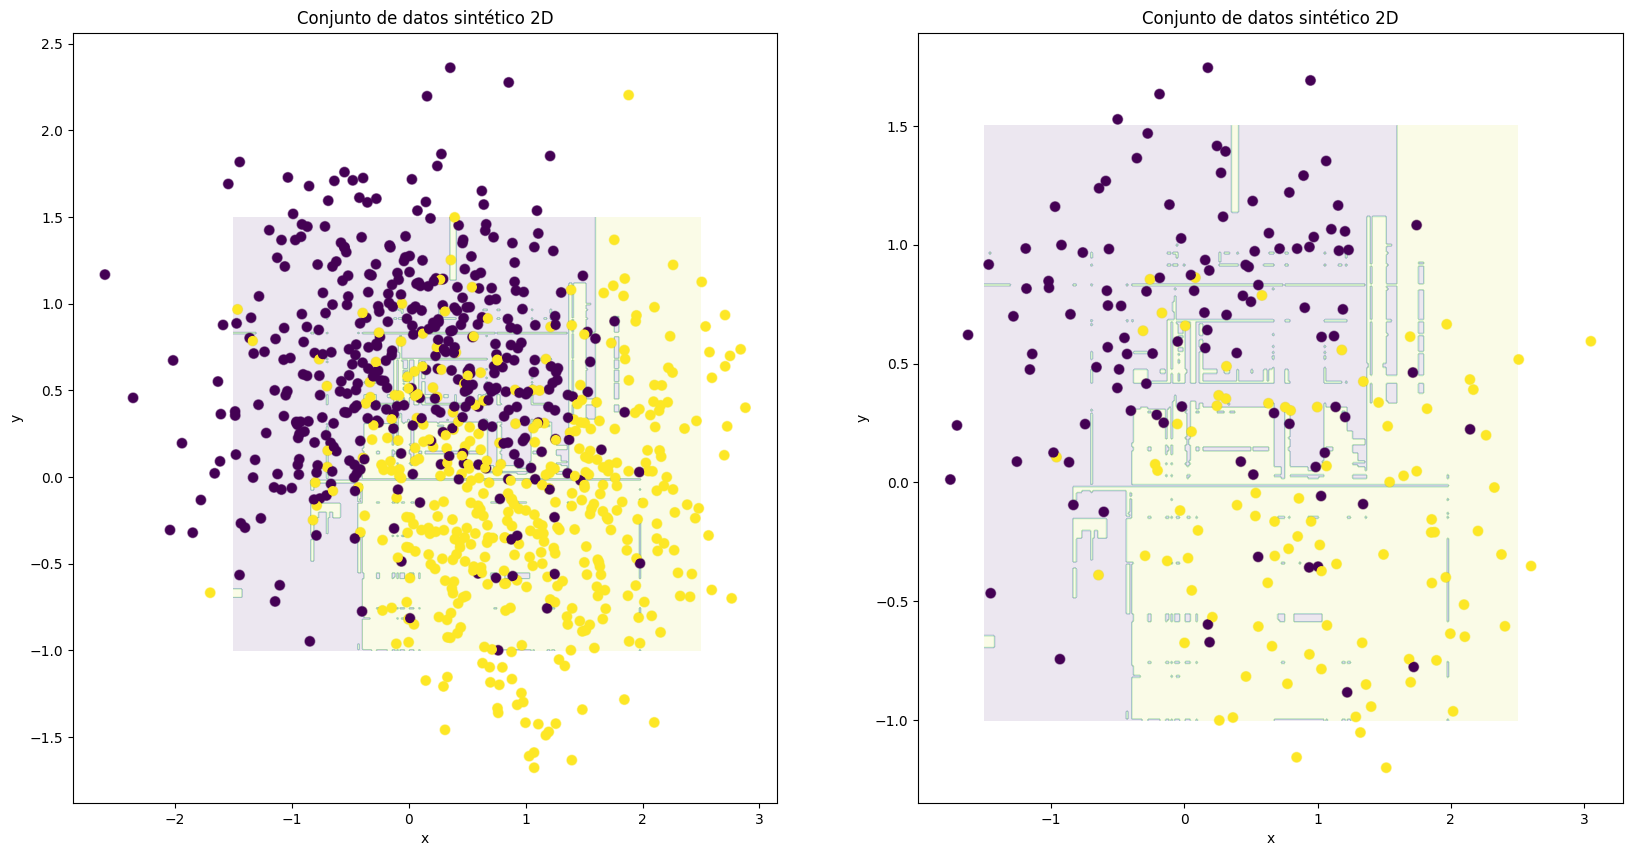

In [ ]:
plt.figure(figsize=(20, 10))

plt.subplot(1, 2, 1)
plt.scatter(X_train_m_2[:, 0], X_train_m_2[:, 1], c=y_train_m_2, alpha=0.5, s = 50)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Conjunto de datos sintético 2D')
dibujar_frontera_decision(gb_clf, X_train_m_2, y_train_m_2, -1.5, 2.5, -1, 1.5)

plt.subplot(1, 2, 2)
plt.scatter(X_test_m_2[:, 0], X_test_m_2[:, 1], c=y_test_m_2, alpha=0.5, s = 50)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Conjunto de datos sintético 2D')
dibujar_frontera_decision(gb_clf, X_test_m_2, y_test_m_2, -1.5, 2.5, -1, 1.5)


plt.show()

# Bosques Aleatorios

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=123)

rf_clf.fit(X_train_m_2, y_train_m_2)
rf_pred = rf_clf.predict(X_test_m_2)

y_p_rf_1 = rf_clf.predict(X_test_m_2)
y_p_rf_2 = rf_clf.predict(X_train_m_2)

print(accuracy_score(y_train_m_2, y_p_rf_2))
print(accuracy_score(y_test_m_2, y_p_rf_1))

0.86375
0.82


* Visualización

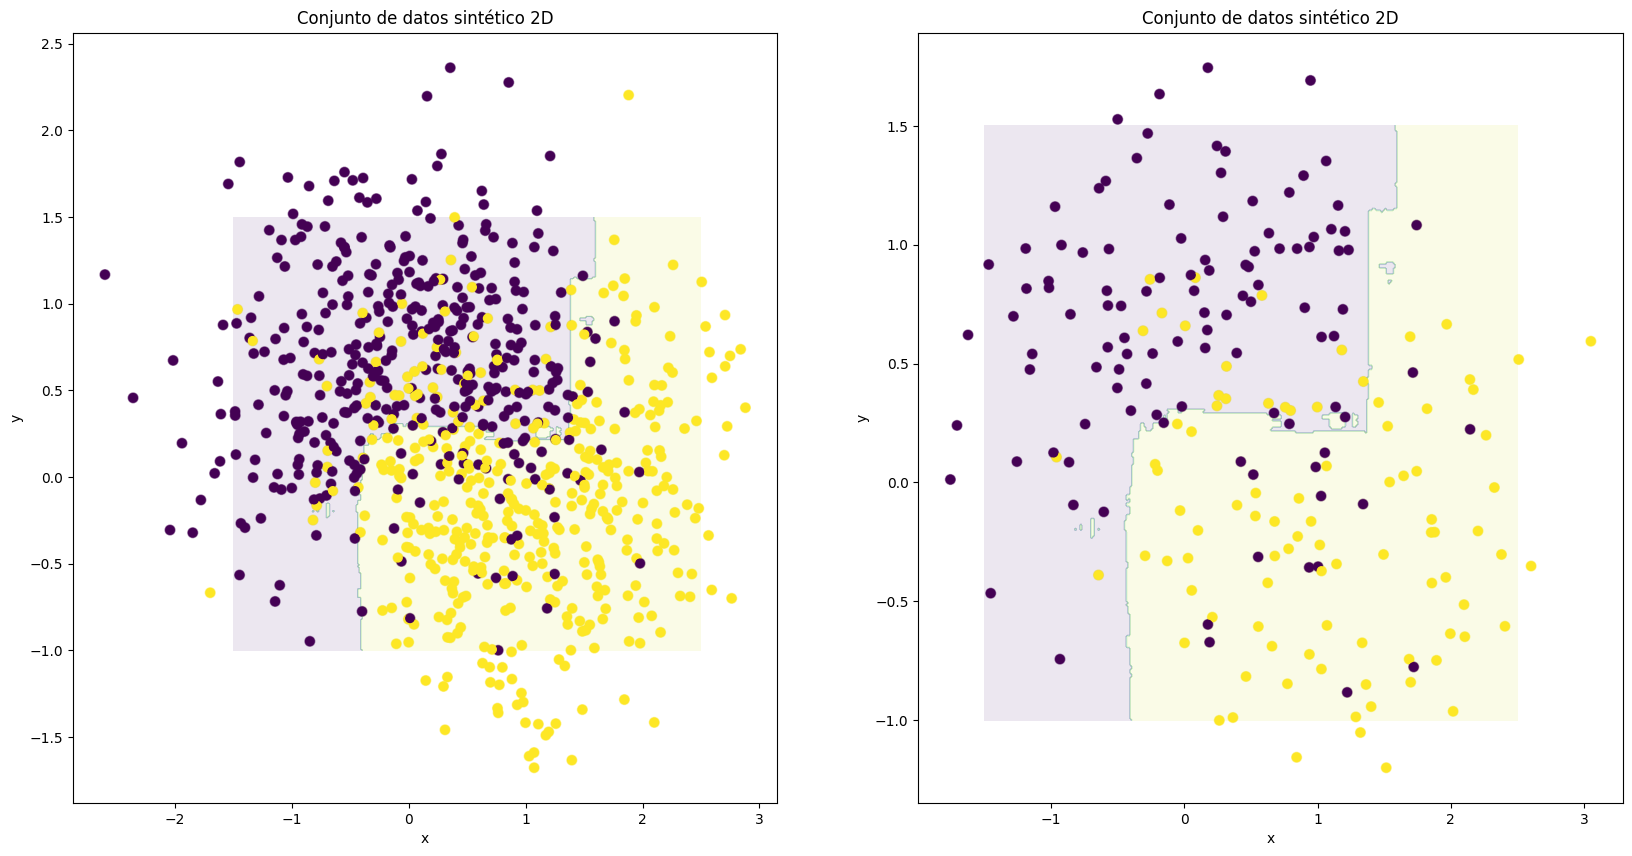

In [ ]:
plt.figure(figsize=(20, 10))

plt.subplot(1, 2, 1)
plt.scatter(X_train_m_2[:, 0], X_train_m_2[:, 1], c=y_train_m_2, alpha=0.5, s = 50)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Conjunto de datos sintético 2D')
dibujar_frontera_decision(rf_clf, X_train_m_2, y_train_m_2, -1.5, 2.5, -1, 1.5)

plt.subplot(1, 2, 2)
plt.scatter(X_test_m_2[:, 0], X_test_m_2[:, 1], c=y_test_m_2, alpha=0.5, s = 50)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Conjunto de datos sintético 2D')
dibujar_frontera_decision(rf_clf, X_test_m_2, y_test_m_2, -1.5, 2.5, -1, 1.5)


plt.show()

* **El RANDOM FOREST funciona mejor que otras para el ruido**

* RF es inherentemente más robusto al ruido gracias al bagging (promedio de múltiples árboles entrenados en subconjuntos aleatorios de datos).